# A Real Dataset

# Getting the dataset ready

## Downloading

In [1]:
import os
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt 
import cv2
from config import *

In [2]:
# Download the data 
if not mnist_name in os.listdir(DATASETS_DIR):

    import urllib
    import urllib.request

    file_name = f'{DATASETS_DIR.joinpath(f"{mnist_name}.zip")}'
    
    # Dowloading
    print(f'Downloading as {DATASETS_DIR.joinpath(mnist_name)}.zip from {mnist_url}....')
    urllib.request.urlretrieve(mnist_url, file_name, )
    print('Successfully Downloaded')

    #Unzip zip file
    from zipfile import ZipFile

    print(f'Unzipping {mnist_name}.zip....')
    with ZipFile(file_name) as files:
        files.extractall(DATASETS_DIR.joinpath(mnist_name))
    print('Successfully Unzipped')

    # delete zip file
    print('Deleting zip file....')
    os.remove(file_name)
    print('Done')
else:
    print('Folder already in', DATASETS_DIR)

Folder already in c:\Users\ydine\Documents\numpyml\nnfs\datasets


## Loading the data to memory

In [3]:
data = {}

for st in os.listdir(DATASETS_DIR.joinpath(mnist_name))[1:]:
    data[st] = {
        'labels' : [],
        'images' : []
    }
    for label in os.listdir(DATASETS_DIR.joinpath(mnist_name).joinpath(st)):
        for image in os.listdir(DATASETS_DIR.joinpath(mnist_name).joinpath(st).joinpath(label)):
            data[st]['labels'].append(label)
            data[st]['images'].append(cv2.imread(
                DATASETS_DIR.joinpath(mnist_name).joinpath(st).joinpath(label).joinpath(image),
                cv2.IMREAD_UNCHANGED
                ))
    data[st]['labels'] = np.array(data[st]['labels'])
    data[st]['images'] = np.array(data[st]['images']).astype(np.uint8)

In [4]:
x = np.ones(shape=(2,3))
x.tolist()

[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0]]

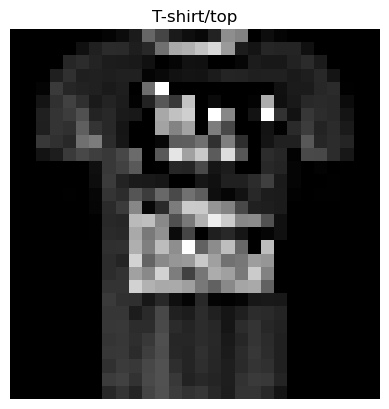

In [5]:
img = np.random.randint(0,len(data['train']['labels']))

plt.figure()
plt.title(mnist_labels[int(data['train']['labels'][img])])
plt.imshow(data['train']['images'][img], cmap=plt.cm.gray)
plt.axis(False)
plt.show()

## Splitting the data

In [6]:
X_train, y_train, X_test, y_test = data['train']['images'],data['train']['labels'],data['test']['images'],data['test']['labels']

In [7]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## Rescaling the data

In [8]:
X_train = (X_train/127.5) - 1
X_test = (X_test/127.5) - 1

In [9]:
X_train.min(), X_train.max()

(-1.0, 1.0)

## Flattening the data to fit out Dense network

In [10]:
X_train = X_train.reshape(60000,-1)
X_test = X_test.reshape(10000,-1)

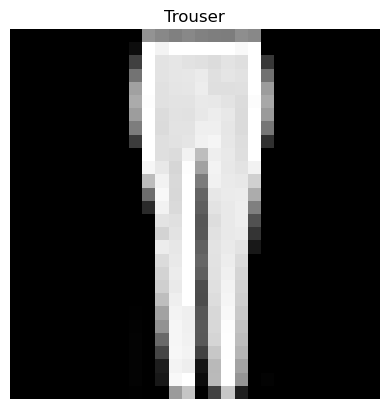

In [11]:
img = np.random.randint(0,60000)


plt.figure()
plt.title(mnist_labels[int(y_train[img])])
plt.imshow(X_train[img].reshape(28,28), cmap=plt.cm.gray)
plt.axis(False)
plt.show()

## Data Shuffling

In [17]:
keys = np.arange(X_train.shape[0])
np.random.shuffle(keys)

In [18]:
X_train = X_train[keys]
y_train = y_train[keys]

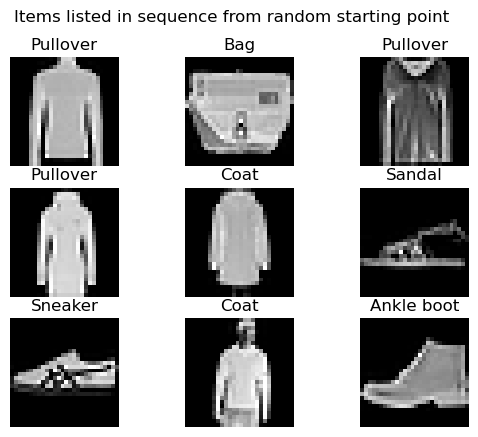

In [39]:
i = np.random.randint(0,60000)

fig, ax = plt.subplots(3,3)
fig.suptitle('Items listed in sequence from random starting point', ha='center')
for img in range(i,i+9):
    ax[(img-i)//3,(img-i)%3].set_title(mnist_labels[int(y_train[img])])
    ax[(img-i)//3,(img-i)%3].imshow(X_train[img].reshape(28,28), cmap=plt.cm.gray)
    ax[(img-i)//3,(img-i)%3].axis(False)
plt.show()